In [0]:
import pandas as pd
import io
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [9]:
from google.colab import files
uploaded = files.upload()

Saving irisdata.txt to irisdata.txt


In [163]:
data = pd.read_csv(io.StringIO(uploaded['irisdata.txt'].decode('utf-8')))
data.columns=['x1','x2','x3','x4','class']
data

,x1,x2,x3,x4,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


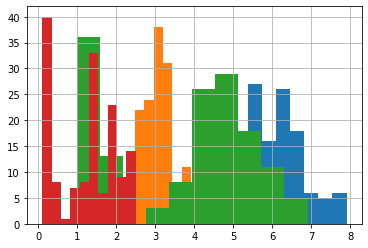

In [164]:
data['x1'].hist()
data['x2'].hist()
data['x3'].hist()
data['x4'].hist()

In [165]:
print(max(data['x1']),max(data['x2']),max(data['x3']),max(data['x4']))

7.9 4.4 6.9 2.5


In [166]:
np.unique(data['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
X = data.loc[:,['x1','x2','x3','x4']]
y = data.loc[:,['class']]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=66,test_size=0.3)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(4,)))
network.add(layers.Dense(3,activation = 'softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
encoder = LabelBinarizer()
y_test = transfomed_label = encoder.fit_transform(y_test)
y_train = transfomed_label = encoder.fit_transform(y_train)

In [0]:
x_train = x_train.astype('float32')/7.9
x_test = x_test.astype('float32')/7.9

In [173]:
history = network.fit(x_train,y_train,epochs=10,batch_size=1,validation_data=(x_test,y_test))

Train on 104 samples, validate on 45 samples
Epoch 1/10
104/104 [==============================] - 0s 2ms/step - loss: 1.0294 - accuracy: 0.5000 - val_loss: 0.9523 - val_accuracy: 0.6222
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 0.8593 - accuracy: 0.6923 - val_loss: 0.7715 - val_accuracy: 0.6444
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.7212 - val_loss: 0.6107 - val_accuracy: 0.9556
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8173 - val_loss: 0.5037 - val_accuracy: 0.9778
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8269 - val_loss: 0.4385 - val_accuracy: 0.9778
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8846 - val_loss: 0.3940 - val_accuracy: 0.9778
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8654 - v

In [174]:
test_loss,test_acc = network.evaluate(x_test,y_test)

45/45 [==============================] - 0s 71us/step


In [175]:
print('test_acc',test_acc)

test_acc 0.9777777791023254


In [176]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

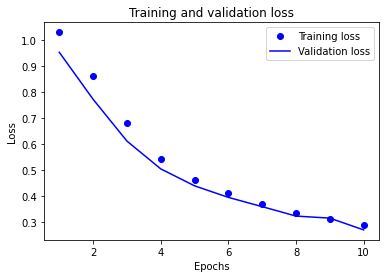

In [177]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


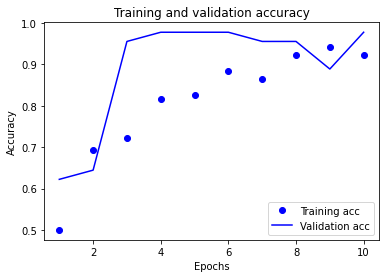

In [178]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
